In [9]:
# Q1
import tensorflow as tf
import keras 

print("TensorFlow version:", tf.__version__)
print("Keras version:",keras.__version__)

TensorFlow version: 2.15.0
Keras version: 2.15.0


In [10]:
# Q2
import pandas as pd

# Assuming you have downloaded the dataset and placed it in the current working directory
data = pd.read_csv("wine.csv")
print("Dimensions of the dataset:", data.shape)

Dimensions of the dataset: (1599, 12)


In [12]:
# Q3
# Check for null values
print("Null values:\n", data.isnull().sum())

# Identify categorical variables
categorical_columns = data.select_dtypes(include=['object']).columns
print("Categorical variables:", categorical_columns)

# Encode categorical variables
data_encoded = pd.get_dummies(data, columns=categorical_columns)

Null values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
Categorical variables: Index(['quality'], dtype='object')


In [15]:
# Print column names to identify the target variable
print("Column names:", data_encoded.columns)

Column names: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality_bad', 'quality_good'],
      dtype='object')


In [43]:
# Q4
# Separate features and target variable
X = data_encoded.drop(['quality_bad', 'quality_good'], axis=1)
y = data_encoded[['quality_bad', 'quality_good']]

In [30]:
# Q5
# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [31]:
# Q6
# Perform scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [37]:
# Q7 (Modify)
# Create 1 neuron in the output layer for binary classification
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # One neuron for binary classification
])


In [38]:
# Q8
# Create a Sequential model and add layers
model = keras.Sequential()
model.add(keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [39]:
# Q9
# Implement TensorBoard callback
tensorboard_callback = keras.callbacks.TensorBoard(log_dir="./logs")

# Q10
# Implement Early Stopping
early_stopping_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Q11
# Implement ModelCheckpoint
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(filepath='best_model.h5', monitor='val_accuracy', save_best_only=True)

# Q12
# Print model summary
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 64)                768       
                                                                 
 dense_22 (Dense)            (None, 32)                2080      
                                                                 
 dense_23 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
# Convert 'quality_bad' and 'quality_good' columns to a single column representing the class label
y_train = y_train['quality_good'].values  # Assuming 'quality_good' is the positive class
y_val = y_val['quality_good'].values

In [44]:
# Q13
import warnings 
warnings.filterwarnings('ignore')
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Q14 (Modify)
# Compile the model with specified loss function, optimizer, and metrics
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Q15
# Fit the model with callbacks
history = model.fit(X_train_scaled, y_train, epochs=20, validation_data=(X_val_scaled, y_val),
                    callbacks=[tensorboard_callback, early_stopping_callback, model_checkpoint_callback])

Epoch 1/20
35/35 [==============================] - 1s 8ms/step - loss: 0.4852 - accuracy: 0.7676 - val_loss: 0.5693 - val_accuracy: 0.6792
Epoch 2/20
35/35 [==============================] - 0s 4ms/step - loss: 0.4787 - accuracy: 0.7685 - val_loss: 0.5635 - val_accuracy: 0.6833
Epoch 3/20
35/35 [==============================] - 0s 4ms/step - loss: 0.4743 - accuracy: 0.7766 - val_loss: 0.5558 - val_accuracy: 0.7042
Epoch 4/20
35/35 [==============================] - 0s 4ms/step - loss: 0.4707 - accuracy: 0.7739 - val_loss: 0.5574 - val_accuracy: 0.7125
Epoch 5/20
35/35 [==============================] - 0s 3ms/step - loss: 0.4664 - accuracy: 0.7757 - val_loss: 0.5532 - val_accuracy: 0.7000
Epoch 6/20
35/35 [==============================] - 0s 3ms/step - loss: 0.4627 - accuracy: 0.7819 - val_loss: 0.5624 - val_accuracy: 0.6917
Epoch 7/20
35/35 [==============================] - 0s 3ms/step - loss: 0.4596 - accuracy: 0.7802 - val_loss: 0.5504 - val_accuracy: 0.7042
Epoch 8/20
35/35 [==

In [45]:
# Q16
# Get model parameters
model.get_weights()

[array([[-2.72055835e-01, -1.66855589e-01,  2.47233704e-01,
         -5.64550012e-02, -8.09762906e-03,  1.18478447e-01,
         -3.22503775e-01, -2.41566479e-01, -6.21218644e-02,
         -1.13345332e-01, -1.25172213e-01, -1.65688291e-01,
          5.08619472e-02,  1.17402345e-01, -2.77523786e-01,
         -1.75720770e-02,  1.36476502e-01, -1.90319493e-01,
          1.38662547e-01,  1.95454478e-01, -2.31673270e-01,
         -1.24445908e-01,  8.90744627e-02, -2.69451868e-02,
         -2.44519860e-01,  3.30264419e-01,  6.94643110e-02,
         -1.84035450e-01,  2.89653353e-02,  1.86182305e-01,
          1.31239489e-01, -2.30874810e-02,  4.19289358e-02,
         -4.97654872e-03,  1.63130552e-01,  7.52630085e-02,
         -2.32209697e-01, -4.81438600e-02,  6.63767904e-02,
          2.08376776e-02, -2.92193979e-01, -2.64273167e-01,
          7.38984495e-02,  1.63454607e-01,  1.33435220e-01,
          1.40746117e-01,  4.35893126e-02, -2.44213104e-01,
         -1.99233413e-01, -2.55779207e-0

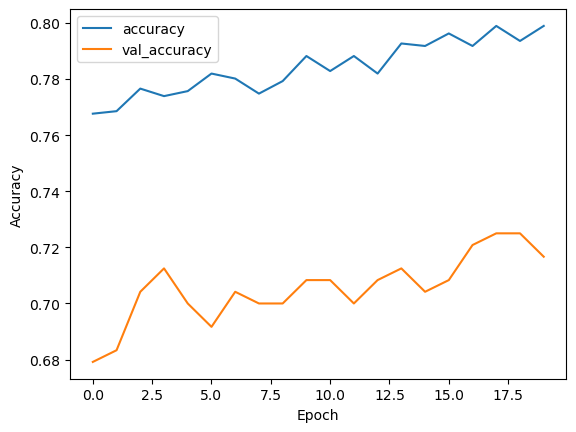

In [46]:
# Q17
# Store training history as a Pandas DataFrame
history_df = pd.DataFrame(history.history)

# Q18
# Plot training history
import matplotlib.pyplot as plt

plt.plot(history_df['accuracy'], label='accuracy')
plt.plot(history_df['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [47]:
# Q19
# Evaluate model performance on test data
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

8/8 [==============================] - 0s 2ms/step - loss: 1.0550 - accuracy: 0.5000
Test Loss: 1.054954171180725, Test Accuracy: 0.5
